In [1]:
import os
import sys
import pandas as pd 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import mat4py as mt

In [ ]:
sys.path.append(os.getcwd())

basefolder = r'/home/server/pi/homes/heminwas/update_aeolis' 

aeolis_directory = r'/home/server/pi/homes/heminwas/update_aeolis/aeolis-python/aeolis'
model_directory = r'/home/server/pi/homes/heminwas/update_aeolis/aeolis-python/aeolis/examples/longterm_dune_growth'

sys.path.append(aeolis_directory)
from console_debug import *

scenario = 'aeolis'
run = os.path.join(model_directory, scenario +str('.txt'))

aeolis_debug(run)

/home/server/pi/homes/heminwas/update_aeolis/aeolis-python/aeolis
/home/server/pi/homes/heminwas/update_aeolis/aeolis-python/aeolis/examples/longterm_dune_growth


In [ ]:
def extract_netcdf(file):
    
    run = nc.Dataset(file, 'r')
    time = run['time'][:]
    x =  run['x'][0,:] #baselineb['x'][1,:].values
    zbi = run['zb'][0,0,:] # baselineb['zb'][0,1,:].values 
    zbf = run['zb'][-1,0,:]
    zb_all = run['zb'][:,0,:]
    
    run.close()
    start_time = datetime(1997, 9, 17, 0, 0)
    dates = [start_time + timedelta(seconds = sec) for sec in time]
    
    return x, zbi, zbf, zb_all, time, dates

In [30]:
def plot(x, zb_all, time, figname ):
    colors_arr = plt.cm.viridis(np.linspace(0, 1, len(time)))
    fig = plt.figure(figsize = (8,5))
    plt.plot(x,zb_all[0,:], color = 'k', linestyle = '--', label = 'Initial Profile')
    for i in range(0, len(time)):
        if i==0 or i == len(time)-1:
            plt.plot(x, zb_all[i,:], color = colors_arr[i], label = str(dates[i])[:-8])
        else:
            plt.plot(x, zb_all[i,:], color = colors_arr[i])
    plt.ylabel('Elevation (m)', fontsize = 14)
    plt.xlabel('Cross-shore Distance (m)', fontsize = 14)
    plt.legend(loc = 'upper left')
    plt.savefig(figname)

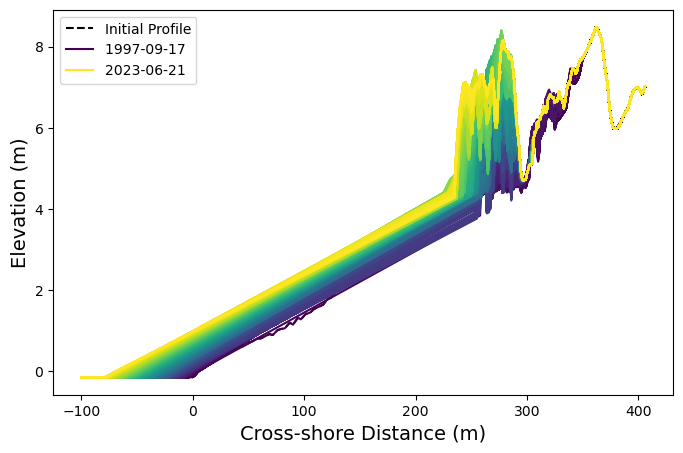

In [31]:
file = scenario +'.nc'
path = os.path.join(model_directory, file)
fig_folder = os.path.join(model_directory,'figures')

x, zbi, zbf, zb_all, time, dates = extract_netcdf(path,fig_folder) 
fig1 = plot(x, zb_all, time, 'aeolis_ex.png')